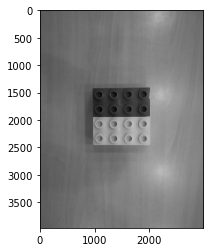

In [1]:
# ez a témalabon pandassal javított változat

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd

DATADIR = "E:/Egyetem/5_felev/Temalab/LEGO/"
CATEGORIES = ['phase_1','phase_2','phase_3','phase_4','phase_5','phase_6']


#egy kép kiírása: (nyilván bonyolultabb, mint kéne, de itt meg van mutatva, hogy hogy is történik az olvasás)
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) 
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break #break nélkül az összeset mutatná
    break

In [2]:
print(img_array)

[[100 100  99 ... 104 103 107]
 [ 99 100  99 ... 105 103 106]
 [ 97  99 100 ... 107 105 106]
 ...
 [ 93  91  92 ... 108 108 112]
 [ 92  92  94 ... 110 109 110]
 [ 92  93  97 ... 113 110 107]]


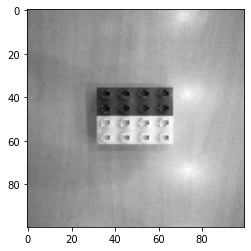

In [3]:
IMG_SIZE = 100

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [4]:
new_array.shape

(100, 100)

In [5]:
training_data = []

def create_training_data():
    errorcounter = 0
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE) #maradjon színes, ne állítsuk greyscale-re
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exeption as e:
                errorcounter+=1   #megnéztük, hogy volt-e error
    print(errorcounter)
            
create_training_data()

0


In [6]:
print(len(training_data))

549


In [7]:
#h ne sorszám alapján gondolkodjon
import random

random.shuffle(training_data)

In [8]:
target = [] #---> 0,1,2,3
data = [] #---->array

for features, label in training_data:
    data.append(features.flatten())  #a flatten miatt lesz a data egy dimenziós, amit a printnél láthatunk is
    target.append(label)

print(data[1].shape)

(10000,)


In [9]:
for i in range(10):
    print(target[i])

3
2
2
5
0
4
0
2
2
1


In [10]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data,target, test_size=0.2)

In [11]:
print(len(X_train))
print(len(Y_train))
print(len(X_test))

439
439
110


In [12]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [13]:
model.score(X_test, Y_test) #pontosság

0.9545454545454546

[0]


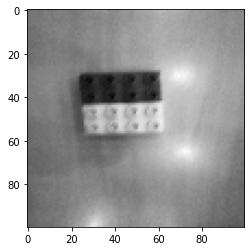

In [14]:
#megnézzük, hogy mit tippel egy bizonyos képre (hogy tényleg jól csinálja-e)
print(model.predict([X_test[2]]))
plt.imshow(X_test[2].reshape(100,100), cmap="gray")
plt.show()

In [19]:
# innentől már csak a confusion mátrixot készítjuk
Y_predicted = model.predict(X_test)
print(Y_test)
print(len(Y_test))
print(Y_predicted)
print(len(Y_predicted))

[2, 2, 0, 2, 4, 2, 2, 3, 3, 3, 2, 0, 0, 4, 1, 1, 2, 0, 2, 1, 1, 4, 0, 4, 1, 3, 2, 5, 5, 3, 2, 5, 2, 5, 4, 0, 0, 1, 1, 1, 3, 5, 0, 2, 2, 1, 5, 3, 2, 4, 2, 1, 4, 4, 1, 1, 0, 5, 2, 5, 3, 3, 4, 0, 2, 3, 1, 1, 5, 2, 5, 4, 4, 5, 0, 1, 1, 1, 4, 2, 3, 4, 1, 5, 0, 0, 1, 3, 2, 2, 0, 1, 3, 3, 3, 5, 4, 2, 5, 0, 0, 4, 0, 1, 1, 2, 1, 5, 4, 2]
110
[2 2 0 2 4 2 2 2 3 3 2 0 0 4 1 1 2 0 2 1 1 4 0 4 1 3 2 5 5 3 2 5 2 5 1 0 0
 1 1 1 3 5 0 2 2 1 5 3 2 4 2 1 4 4 1 1 0 5 2 5 2 3 4 0 2 3 1 1 5 2 5 4 4 5
 0 1 1 1 3 2 3 4 1 5 0 0 1 3 2 2 0 1 1 3 3 5 4 2 5 0 0 4 0 1 1 2 1 5 4 2]
110


In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_predicted)
cm

array([[17,  0,  0,  0,  0,  0],
       [ 0, 23,  0,  0,  0,  0],
       [ 0,  0, 24,  0,  0,  0],
       [ 0,  1,  2, 12,  0,  0],
       [ 0,  1,  0,  1, 14,  0],
       [ 0,  0,  0,  0,  0, 15]], dtype=int64)

Text(69.0, 0.5, 'Truth')

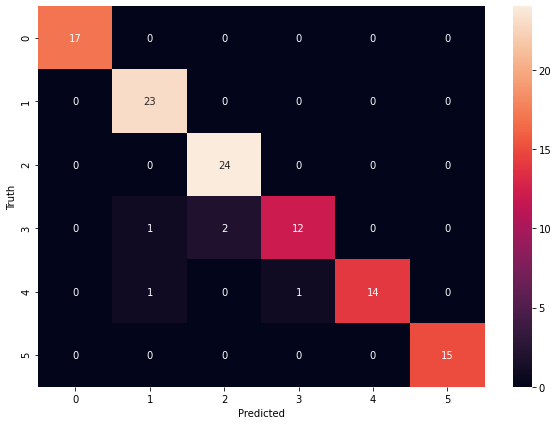

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')